This notebook explores ways of timing Python functions and the complexity of algorithms.

Date Created: 18 Mar 2018 
<br>
Last Modified: 21 Mar 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. timeit
`timeit` module docs:
https://docs.python.org/2/library/timeit.html

Notes:
- timeit disables Python's garbage collection for the duration of its tests.

In [2]:
import timeit

In [3]:
def making_zeroes1(N):
    a = []
    for i in range(N):
        a.append(0.)
    return np.array(a)

def making_zeroes2(N):
    return np.array([0. for i in range(N)])

def making_zeroes3(N):
    return np.array([0.] * N)

def making_zeroes4(N):
    return np.zeros(N)

In [4]:
making_zeroes4(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
making_zeroes4(10).dtype

dtype('float64')

In [6]:
N = 100

number_of_runs = 1000
t1 = timeit.timeit("making_zeroes1(N)", 
                   setup = "from __main__ import making_zeroes1, N", 
                   number = number_of_runs)

t2 = timeit.timeit("making_zeroes2(N)", 
                   setup = "from __main__ import making_zeroes2, N", 
                   number = number_of_runs)

t3 = timeit.timeit("making_zeroes3(N)", 
                   setup = "from __main__ import making_zeroes3, N", 
                   number = number_of_runs)

t4 = timeit.timeit("making_zeroes4(N)", 
                   setup = "from __main__ import making_zeroes4, N", 
                   number = number_of_runs)

print("making_zeroes1(): %.6f ms" % (t1*1000))
print("making_zeroes2(): %.6f ms" % (t2*1000))
print("making_zeroes3(): %.6f ms" % (t3*1000))
print("making_zeroes4(): %.6f ms" % (t4*1000))

making_zeroes1(): 24.621161 ms
making_zeroes2(): 10.610160 ms
making_zeroes3(): 7.439862 ms
making_zeroes4(): 1.301809 ms


# 2. Performance Analysis

https://en.wikipedia.org/wiki/Big_O_notation

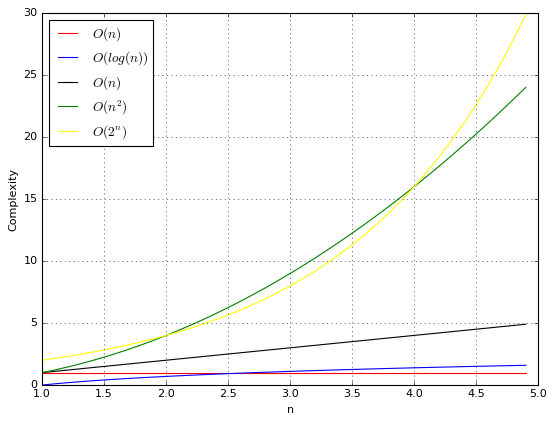

In [7]:
n = np.arange(1, 5, 0.1)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(n, np.ones(len(n)), color='red', label='$O(n)$')
ax1.plot(n, np.log(n), color='blue', label='$O(log(n))$')
ax1.plot(n, n, color='black', label='$O(n)$')
ax1.plot(n, n**2, color='green', label=r'$O(n^2)$')
ax1.plot(n, 2**n, color='yellow', label=r'$O(2^n)$')
ax1.set_xlabel('n')
ax1.set_ylabel('Complexity')
plt.grid()
ax1.legend(loc='upper left')

plt.show()

# 3. Algorithms Matter

Example - Anagram checker

In [8]:
s1 = "heart"
s2 = "earth"

In [17]:
def anagram_checker1(s1, s2):
    s1_len = len(s1)
    s2_len = len(s2)
    
    # Test 1
    if s1_len != s2_len:
        return False
    
    # Test 2
    s2_list = list(s2) # Convert immutable string to mutable list
    for i in range(0,s1_len):
        c1 = s1[i]
        for j in range(s1_len-1-i,-1,-1): # Equivalent to range(0,len(s2_list)) backwards:
            if c1 == s2_list[j]:
                s2_list.pop(j)
#                 print(s2_list)
                break
                
    if s2_list == []:
        return True
    else:
        return False

In [11]:
anagram_checker1("heart", "earth")

['e', 'a', 'r', 't']
['a', 'r', 't']
['r', 't']
['t']
[]


True

In [12]:
def anagram_checker2(s1, s2):
    counts1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    counts2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    pos_a = ord('a') # ASCII code for 'a' = 97
    
    for i in range(len(s1)):
        pos = ord(s1[i]) - pos_a
        counts1[pos] = counts1[pos] + 1
        
    for i in range(len(s2)):
        pos = ord(s2[i]) - pos_a
        counts2[pos] = counts2[pos] + 1
        
    if counts1 == counts2:
        return True
    else:
        return False

In [13]:
anagram_checker2("heart", "earth")

True

In [18]:
s1 = "heart"
s2 = "earth"

# s1 = "".join(['a'] * 1000)
# s2 = "".join(['a'] * 1000)

number_of_runs = 100
t1 = timeit.timeit("anagram_checker1(s1,s2)", 
                   setup = "from __main__ import anagram_checker1, s1, s2", 
                   number = number_of_runs)
t2 = timeit.timeit("anagram_checker2(s1,s2)", 
                   setup = "from __main__ import anagram_checker2, s1, s2", 
                   number = number_of_runs)


print("anagram_checker1(): %.9f ms" % t1)
print("anagram_checker2(): %.9f ms" % t2)
print("t1/t2: %.5f" % (t1/t2))

anagram_checker1(): 0.000667846 ms
anagram_checker2(): 0.000401567 ms
t1/t2: 1.66310


In [19]:
def anagram_checker3(s1, s2):
    # Test 1
    if len(s1) != len(s2):
        return False
    
    # Test 2
    result = True
    for c in s2:
        result = result and (c in s1)
        
    return result

In [20]:
anagram_checker3("heart", "earth")

True

In [21]:
t3 = timeit.timeit("anagram_checker3(s1,s2)", 
                   setup = "from __main__ import anagram_checker3, s1, s2", 
                   number = number_of_runs)
print("anagram_checker3(): %.9f ms" % t3)
print("t2/t3: %.5f" % (t2/t3))

anagram_checker3(): 0.000097616 ms
t2/t3: 4.11374


# 4. Hashing

In [22]:
import random

In [23]:
random.randrange?

In [24]:
random.randrange(0,100)

8

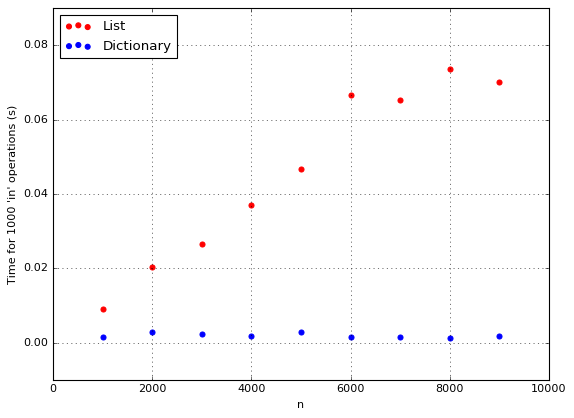

In [39]:
n_min = 1000
n_max = 10000
n_step = 1000
the_range = range(n_min, n_max, n_step)
n_len = len(the_range)

t1 = np.zeros(n_len)
t2 = np.zeros(n_len)

ind = 0

n_repeat = 1000

for i in the_range:
    t = timeit.Timer("random.randrange(0,%d) in x" % i,
                     "from __main__ import random, x")
    
    # Making the list and timing the search
    x = list(range(i)) 
    t1[ind] = t.timeit(number = n_repeat)
    
    # Making the dictionary and timing the search
    x = {j:None for j in range(i)}
    t2[ind] = t.timeit(number = n_repeat)

    ind = ind + 1
    

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.scatter(the_range, t1, color='red', marker='o', label='List')
ax1.scatter(the_range, t2, color='blue', marker='o', label='Dictionary')
ax1.set_xlabel('n')
ax1.set_ylabel('Time for %d \'in\' operations (s)' % n_repeat)
plt.grid()
ax1.legend(loc='upper left')

plt.show()

In [26]:
{j:None for j in range(10)}

{0: None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None}